In [242]:
import pandas as pd

In [243]:
#"""
# loading datasets
orders = pd.read_csv('orders.csv')
products = pd.read_csv("products.csv")
products['product_name'] = products['product_name'].apply(lambda x: x.upper())
products['product_name'] = products['product_name'].apply(lambda x: x.replace(",","~~"))
order_products_train = pd.read_csv("order_products__train.csv")

# Merging datasets
full = order_products_train.merge(products, on='product_id',how='outer', indicator=True)
# lost 10565 observations possible due this is train data.

# reset index and organize by values data
full =full[full['_merge']=='both'].reset_index(drop=True)
full =full.sort_values('order_id')


# Pass the transaction to list of lists,
# keeping the transactions in data.
transactions ={}
for iden in full['order_id'].unique():
    transactions[iden]=[]
for index in full.index:
    transactions[full.loc[index,'order_id']].append(full.loc[index,'product_name'])

data = []
for t in transactions:
    data.append(transactions[t])
    
data_ = data.copy()
data4 = [T for T in data if len(T)<=4]
data15 = [T for T in data if len(T)<=15]

# Pass data to a csv file

with open('TransactionsInstacart.csv','w') as f:
    for transaction in data_:
        for item in transaction:
            f.write(str(item) + '|')
        f.write('\n')
        
        
with open('TransactionsInstacart4.csv','w') as f:
    for transaction in data4:
        for item in transaction:
            f.write(str(item) + '|')
        f.write('\n')
                
        
with open('TransactionsInstacart15.csv','w') as f:
    for transaction in data15:
        for item in transaction:
            f.write(str(item) + '|')
        f.write('\n')
        
#"""

In [244]:
# run apriori algorithm 

In [245]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [246]:
%%R
#install.packages("arules")

NULL


In [247]:
%%R
library("arules")
# After that we can the products we can describe the aisles and departments!

In [248]:
%%R
baskets <- read.transactions('TransactionsInstacart.csv', sep="|")
baskets4 <- read.transactions('TransactionsInstacart4.csv', sep="|")
baskets15 <- read.transactions('TransactionsInstacart15.csv', sep="|")

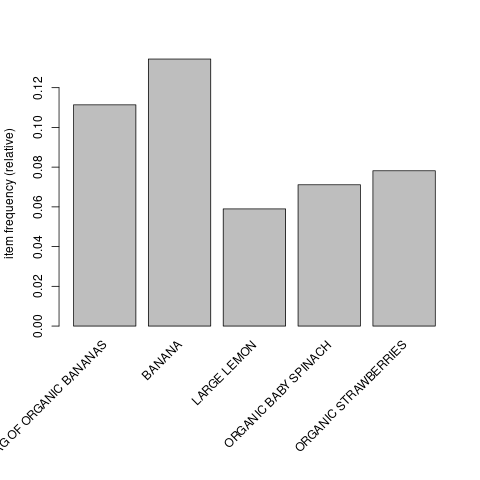

In [249]:
%%R
itemFrequencyPlot(baskets,support=0.055)  #minsuport
# we can uses topN=# to see the more 

In [250]:
%%R
Rules <- apriori(baskets, parameter=list(support=0.01, confidence=0.1, minlen=2))
rulesordered <- sort(Rules, by = "lift")[1:5]
inspect(rulesordered)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1312 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[49103 item(s), 131209 transaction(s)] done [1.95s].
sorting and recoding items ... [95 item(s)] done [0.04s].
creating transaction tree ... done [0.13s].
checking subsets of size 1 2 3 done [0.02s].
writing ... [25 rule(s)] done [0.00s].
creating S4 object  ... done [0.11s].
    lhs                       rhs                      support    confidence
[1] {LIMES}                => {LARGE LEMON}            0.01134069 0.2586027 
[2] {LARGE LEMON}          => {LIMES}                  0.01134069 0.1922481 
[3] {ORGANIC RASPBERRIES}  => {ORGANIC STRAWBERRIES}

In [251]:
df = [['item1','item2', 'item3', 'item4'], ['item2','item'], ['item','item3','item1'], ['item1', 'last']]

In [252]:
counter = pd.DataFrame([len(T) for T in data], columns=['k-itemset'])

In [253]:
to_testing = pd.DataFrame(counter['k-itemset'].value_counts().sort_index())

In [254]:
to_testing['k-itemset'].sum()

131209

In [255]:
to_testing[['k-itemset']].cumsum().to_excel('cumulativedistribution.xlsx')

In [256]:
to_testing['k-itemset'].value_counts()

2      6
1      3
3      3
4      3
5      2
      ..
860    1
679    1
634    1
553    1
403    1
Name: k-itemset, Length: 63, dtype: int64

<AxesSubplot:>

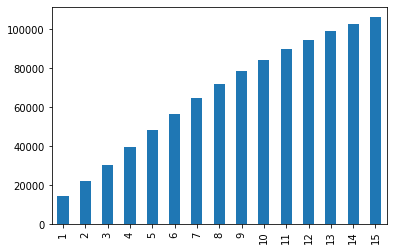

In [257]:
import pandas as pd
cumsum = pd.read_excel('cumulativedistribution.xlsx')
cumsum[1:16]['k-itemset'].plot(kind='bar')

<AxesSubplot:>

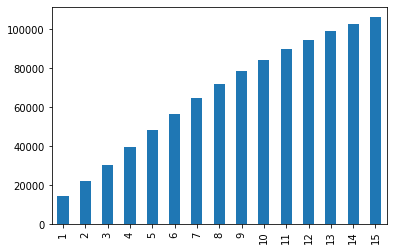

In [258]:
cumsum[1:16]['k-itemset'].plot(kind='bar')

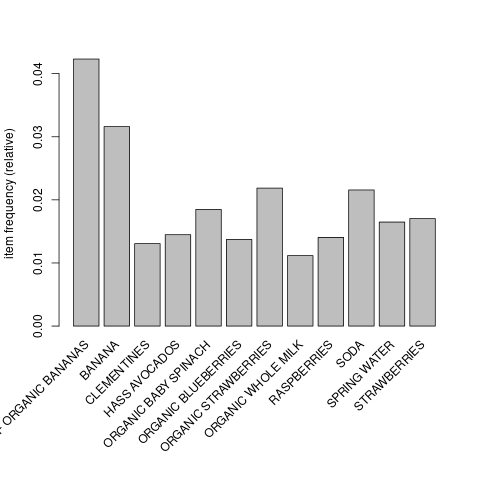

In [259]:
%%R
itemFrequencyPlot(baskets4,support=0.01)  #minsuport

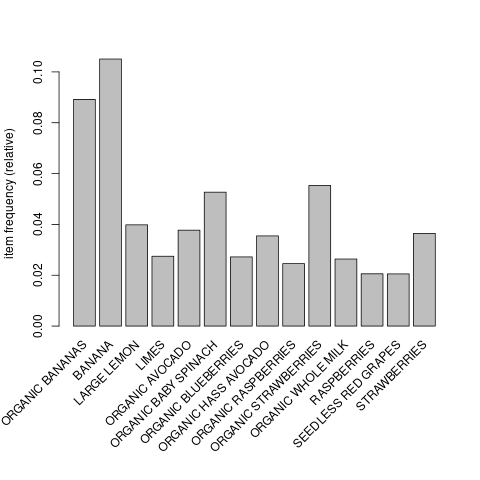

In [260]:
%%R
itemFrequencyPlot(baskets15,support=0.02)  #minsuport

In [261]:
%%R
Rules <- apriori(baskets, parameter=list(support=0.001, confidence=0.3, minlen=2))
rulesordered <- sort(Rules, by = "lift")
inspect(rulesordered)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5   0.001      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 131 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[49103 item(s), 131209 transaction(s)] done [2.16s].
sorting and recoding items ... [1722 item(s)] done [0.06s].
creating transaction tree ... done [0.20s].
checking subsets of size 1 2 3 4 done [0.15s].
writing ... [233 rule(s)] done [0.01s].
creating S4 object  ... done [0.13s].
      lhs                                                       rhs                                                         support confidence    coverage      lift count
[1]   {BLUEBERRY YOGHURT}                                    => {STRAWBERRY RHUBARB YOGHURT}                

[26]  {ORGANIC AVOCADO,                                                                                                                                                   
       ORGANIC RED ONION}                                    => {LIMES}                                                 0.001158457  0.3058350 0.003787850  6.973984   152
[27]  {ASPARAGUS,                                                                                                                                                         
       LIMES}                                                => {LARGE LEMON}                                           0.001143214  0.3836317 0.002979979  6.503351   150
[28]  {BAG OF ORGANIC BANANAS,                                                                                                                                            
       ORGANIC RASPBERRIES,                                                                                                                      

[48]  {ORGANIC RASPBERRIES,                                                                                                                                               
       ORGANIC WHOLE MILK}                                   => {ORGANIC STRAWBERRIES}                                  0.001105107  0.3972603 0.002781821  5.081314   145
[49]  {ORGANIC LARGE EXTRA FANCY FUJI APPLE,                                                                                                                              
       ORGANIC RASPBERRIES}                                  => {ORGANIC STRAWBERRIES}                                  0.001089864  0.3823529 0.002850414  4.890636   143
[50]  {ORGANIC CUCUMBER,                                                                                                                                                  
       ORGANIC RASPBERRIES}                                  => {ORGANIC STRAWBERRIES}                                  0.001402343  0.3755102 0.

[71]  {ORGANIC CUCUMBER,                                                                                                                                                  
       ORGANIC GRAPE TOMATOES}                               => {ORGANIC BABY SPINACH}                                  0.001051757  0.3019694 0.003482993  4.245269   138
[72]  {BAG OF ORGANIC BANANAS,                                                                                                                                            
       ORGANIC GRADE A FREE RANGE LARGE BROWN EGGS}          => {ORGANIC STRAWBERRIES}                                  0.001021271  0.3316832 0.003079057  4.242525   134
[73]  {ORGANIC GALA APPLES,                                                                                                                                               
       ORGANIC HASS AVOCADO}                                 => {BAG OF ORGANIC BANANAS}                                0.001219429  0.4651163 0.

       ORGANIC STRAWBERRIES}                                 => {BAG OF ORGANIC BANANAS}                                0.001135593  0.4318841 0.002629393  3.878119   149
[95]  {ORGANIC CUCUMBER,                                                                                                                                                  
       ORGANIC RASPBERRIES}                                  => {BAG OF ORGANIC BANANAS}                                0.001600500  0.4285714 0.003734500  3.848373   210
[96]  {BAG OF ORGANIC BANANAS,                                                                                                                                            
       ORGANIC GRAPE TOMATOES}                               => {ORGANIC STRAWBERRIES}                                  0.001669093  0.3004115 0.005556021  3.842532   219
[97]  {APPLE HONEYCRISP ORGANIC,                                                                                                                 

[118] {ORGANIC BABY SPINACH,                                                                                                                                              
       ORGANIC HASS AVOCADO}                                 => {BAG OF ORGANIC BANANAS}                                0.003330564  0.3819930 0.008718914  3.430120   437
[119] {ORGANIC GRADE A FREE RANGE LARGE BROWN EGGS,                                                                                                                       
       ORGANIC STRAWBERRIES}                                 => {BAG OF ORGANIC BANANAS}                                0.001021271  0.3817664 0.002675121  3.428085   134
[120] {ORGANIC RASPBERRIES,                                                                                                                                               
       ORGANIC WHOLE MILK}                                   => {BAG OF ORGANIC BANANAS}                                0.001059379  0.3808219 0.

       ORGANIC UNSWEETENED ALMOND MILK}                      => {BAG OF ORGANIC BANANAS}                                0.001089864  0.3479319 0.003132407  3.124267   143
[142] {ORGANIC GRANNY SMITH APPLE,                                                                                                                                        
       ORGANIC STRAWBERRIES}                                 => {BAG OF ORGANIC BANANAS}                                0.001181321  0.3475336 0.003399157  3.120691   155
[143] {ASPARAGUS,                                                                                                                                                         
       ORGANIC HASS AVOCADO}                                 => {BAG OF ORGANIC BANANAS}                                0.001006029  0.3473684 0.002896143  3.119208   132
[144] {HONEYCRISP APPLE,                                                                                                                         

       ORGANIC BLUEBERRIES}                                  => {BAG OF ORGANIC BANANAS}                                0.001570014  0.3203733 0.004900578  2.876804   206
[169] {ORGANIC CUCUMBER,                                                                                                                                                  
       ORGANIC ZUCCHINI}                                     => {BAG OF ORGANIC BANANAS}                                0.001059379  0.3202765 0.003307700  2.875935   139
[170] {ORGANIC BLUEBERRIES,                                                                                                                                               
       ORGANIC RASPBERRIES}                                  => {BAG OF ORGANIC BANANAS}                                0.001501421  0.3198052 0.004694800  2.871703   197
[171] {ORGANIC GARLIC,                                                                                                                           

       MICHIGAN ORGANIC KALE}                                => {BANANA}                                                0.001181321  0.3475336 0.003399157  2.585594   155
[199] {LARGE LEMON,                                                                                                                                                       
       ORGANIC AVOCADO}                                      => {BANANA}                                                0.003300079  0.3475120 0.009496300  2.585434   433
[200] {BROCCOLI CROWN,                                                                                                                                                    
       ORGANIC BABY SPINACH}                                 => {BANANA}                                                0.001272779  0.3457557 0.003681150  2.572367   167
[201] {CUCUMBER KIRBY,                                                                                                                           

[226] {ORGANIC AVOCADO,                                                                                                                                                   
       ORGANIC ZUCCHINI}                                     => {BANANA}                                                0.001303264  0.3114754 0.004184164  2.317327   171
[227] {ORGANIC AVOCADO,                                                                                                                                                   
       ORGANIC GRAPE TOMATOES}                               => {BANANA}                                                0.001463314  0.3091787 0.004732907  2.300240   192
[228] {BERRY MEDLEY}                                         => {BANANA}                                                0.001509043  0.3088924 0.004885336  2.298109   198
[229] {EUROPEAN CUCUMBER}                                    => {BANANA}                                                0.001364236  0.3075601 0.

In [262]:
%%R
write(Rules,
      file = "rulesdatabase.csv",
      sep = "|",
      quote = TRUE,
      row.names = FALSE)

In [263]:
pyrules = pd.read_csv("rulesdatabase.csv", sep='|')

In [264]:
pyrules

,rules,support,confidence,coverage,lift,count
0,{ORGANIC FUJI APPLES} => {BAG OF ORGANIC BANANAS},0.001029,0.333333,0.003087,2.993179,135
1,{NONFAT ICELANDIC STYLE STRAWBERRY YOGURT} => ...,0.001090,0.412104,0.002645,81.433314,143
2,{SWEET POTATO YAM} => {BANANA},0.001059,0.364829,0.002904,2.714272,139
3,{ORGANIC YELLOW SQUASH} => {ORGANIC ZUCCHINI},0.001235,0.451253,0.002736,13.686666,162
4,{ORGANIC WHOLE GRASSMILK MILK} => {BAG OF ORGA...,0.001151,0.338565,0.003399,3.040157,151
...,...,...,...,...,...,...
228,"{BAG OF ORGANIC BANANAS,ORGANIC HASS AVOCADO,O...",0.001410,0.426267,0.003308,5.452340,185
229,"{BAG OF ORGANIC BANANAS,ORGANIC RASPBERRIES,OR...",0.001410,0.333935,0.004222,6.416061,185
230,"{BAG OF ORGANIC BANANAS,ORGANIC HASS AVOCADO,O...",0.001410,0.306799,0.004596,7.804349,185
231,"{ORGANIC BABY SPINACH,ORGANIC HASS AVOCADO,ORG...",0.001059,0.474403,0.002233,4.259917,139


In [265]:
pyrules.to_excel("rules.xlsx")